In [40]:
import random

def initialize_population(num_elements, sizes, container_capacity):
    population = []
    for _ in range(num_elements):
        solution = []
        containers = []
        for i in range(num_elements):
            # Buscar un contenedor donde el elemento pueda ser colocado
            for j, current_load in enumerate(containers):
                if current_load + sizes[i] <= container_capacity:
                    solution.append(j)
                    containers[j] += sizes[i]
                    break
            else:
                # Si no se encontró un contenedor, crear uno nuevo
                containers.append(sizes[i])
                solution.append(len(containers) - 1)
        population.append(solution)
    return population

def evaluate_solution(solution, sizes, container_capacity):
    num_containers = max(solution) + 1
    container_loads = [0] * num_containers
    for i, element in enumerate(solution):
        container_loads[element] += sizes[i]
    over_capacity = sum(max(0, container_loads[i] - container_capacity) for i in range(num_containers))
    # Si los elementos no caben en los contenedores, penalizar la solución
    if over_capacity > 0:
        return float('inf')
    else:
        return num_containers
import matplotlib.pyplot as plt

def harris_hawks_optimization(num_elements, sizes, container_capacity, max_iterations):
    population = initialize_population(num_elements, sizes, container_capacity)
    best_solution = None
    best_fitness = float('inf')
    best_fitness_per_iteration = []

    for _ in range(max_iterations):
        for i, solution in enumerate(population):
            fitness = evaluate_solution(solution, sizes, container_capacity)
            if fitness < best_fitness:
                best_fitness = fitness
                best_solution = solution
            best_fitness_per_iteration.append(best_fitness)

            random_solution = random.choice(population)
            if fitness < evaluate_solution(random_solution, sizes, container_capacity):
                for j in range(num_elements):
                    if random.random() < 0.5:
                        solution[j] = random_solution[j]

            for j in range(num_elements):
                if random.random() < 0.5:
                    solution[j] = best_solution[j]

    return best_solution, best_fitness, best_fitness_per_iteration


# Parametros conocidos
Numero_Elementos = 150
weight = [42, 69, 67, 57, 93, 90, 38, 36, 45, 42, 33, 79, 27, 57, 44, 84, 86, 92, 46, 38, 85,
33, 82, 73, 49, 70, 59, 23, 57, 72, 74, 69, 33, 42, 28, 46, 30, 64, 29, 74, 41, 49, 55, 98, 80, 32, 25, 38,
82, 30, 35, 39, 57, 84, 62, 50, 55, 27, 30, 36, 20, 78, 47, 26, 45, 41, 58, 98, 91, 96, 73, 84, 37, 93, 91,
43, 73, 85, 81, 79, 71, 80, 76, 83, 41, 78, 70, 23, 42, 87, 43, 84, 60, 55, 49, 78, 73, 62, 36, 44, 94, 69,
32, 96, 70, 84, 58, 78, 25, 80, 58, 66, 83, 24, 98, 60, 42, 43, 43, 39, 97, 57, 81, 62, 75, 81, 23, 43, 50,
38, 60, 58, 70, 88, 36, 90, 37, 45, 45, 39, 44, 53, 70, 24, 82, 81, 47, 97, 35, 65, 74, 68, 49, 55, 52, 94,
95, 29, 99, 20, 22, 25, 49, 46, 98, 59, 98, 60, 23, 72, 33, 98, 80, 95, 78, 57, 67, 53, 47, 53, 36, 38, 92,
30, 80, 32, 97, 39, 80, 72, 55, 41, 60, 67, 53, 65, 95, 20, 66, 78, 98, 47, 100, 85, 53, 53, 67, 27, 22, 61,
43, 52, 76, 64, 61, 29, 30, 46, 79, 66, 27, 79, 98, 90, 22, 75, 57, 67, 36, 70, 99, 48, 43, 45, 71, 100, 88,
48, 27, 39, 38, 100, 60, 42, 20, 69, 24, 23, 92, 32 ]
Capacidad_Container = 152
Iteraciones = 1000

best_solution, best_fitness, best_fitness_per_iteration = harris_hawks_optimization(Numero_Elementos, weight , Capacidad_Container, Iteraciones)
print("Mejor solución encontrada:", best_solution)
print("Número de contenedores en la mejor solución encontrada:", best_fitness)


Mejor solución encontrada: [0, 0, 1, 1, 2, 3, 0, 2, 3, 4, 4, 5, 1, 4, 5, 6, 7, 8, 6, 7, 9, 8, 10, 11, 9, 10, 11, 2, 12, 12, 13, 13, 14, 14, 5, 14, 14, 15, 15, 16, 15, 16, 17, 18, 17, 18, 7, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22, 8, 22, 23, 4, 23, 24, 16, 24, 24, 25, 26, 25, 27, 28, 29, 23, 30, 31, 26, 28, 32, 33, 34, 33, 35, 36, 37, 27, 38, 34, 12, 29, 39, 30, 40, 31, 32, 35, 41, 36, 37, 38, 39, 42, 41, 38, 43, 44, 45, 40, 44, 29, 46, 42, 45, 47, 43, 48, 46, 47, 48, 49, 49, 50, 49, 51, 51, 52, 53, 35, 50, 52, 53, 54, 54, 55, 56, 55, 57, 55, 56, 57, 58, 58, 58, 59, 43, 59, 60, 60, 61, 61, 62]
Número de contenedores en la mejor solución encontrada: 63


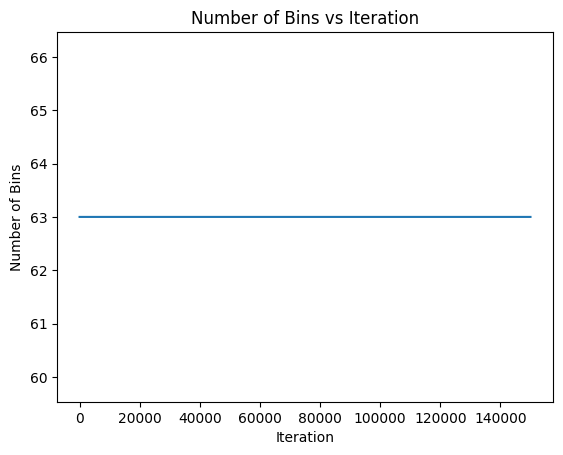

In [39]:

plt.plot(best_fitness_per_iteration)
plt.xlabel('Iteration')
plt.ylabel('Number of Bins')
plt.title('Number of Bins vs Iteration')
plt.show()